<h1> Überschrift 1 </h1>
Zuerst werden zufällig Datensätze angelegt (und diese in einem Scatterplot dargestellt -> Zu viele Merkmale, kann nur 2 darstellen im Scatterplot)

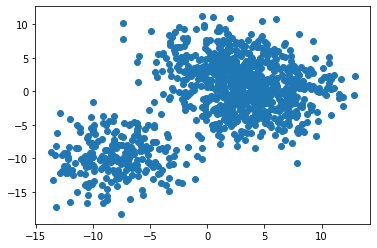

In [1]:
from sklearn.datasets import make_blobs
import sklearn
from sklearn.cluster import KMeans as KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#Doku für make_blobs
X , y= make_blobs(n_samples = 1000, n_features=5, centers=4, cluster_std=3, random_state=0)
#X = The generated samples (Xndarray [ndarray = n dimensionales array] of shape (n_samples, n_features))
#y = The integer labels for cluster membership of each sample ((n_samples,)-> Nicht notwendig?

#print(X)
#print("-----------")
#print(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1]) # Stellt die Verteilung der 1000 Samples anhand der ersten 2 Merkmale dar
# X[:,0] Alles aus der ersten Spalte -> Stellt nur das erste Merkmal dar
#X[:,1] alles aus der zweiten Spalte -> Stellt nur das zweite Merkmal dar

Die blauen Punkte stellen 1000 Kunden dar, diese sollen in vier Gruppen wie zB Bonitäts- oder Prioritätsklassen anhand der fünf Merkmale segementiert werden.

<h2> Visualisierung der Abhängigkeiten mit seaborn.pairplot </h2>

        Gehalt      Alter   Merkmal3   Merkmal4   Merkmal5  Prioritätsklasse
0     4.290005   1.259310   0.248272   3.661889  -0.144461                 0
1     1.681067  -2.458633   2.345374   7.185750  -1.590872                 1
2     4.593213  -0.934498   5.196479  11.328428 -16.728120                 2
3    -0.061675   2.912999   3.499712  -3.724727  -1.337118                 0
4     2.348517   1.409951  -0.292620   0.566496  -4.690789                 0
..         ...        ...        ...        ...        ...               ...
995  -0.273205  -2.541545   9.553714  11.305926   1.590382                 1
996   0.605529  -2.690792   9.946217  12.060691  -1.217652                 1
997  -7.930968 -14.081865   5.212296  11.049461   5.036039                 3
998   3.093534   6.031378   0.358702  11.234909 -11.089592                 2
999 -10.667132 -12.361535  11.974566   5.649404   9.059135                 3

[1000 rows x 6 columns]


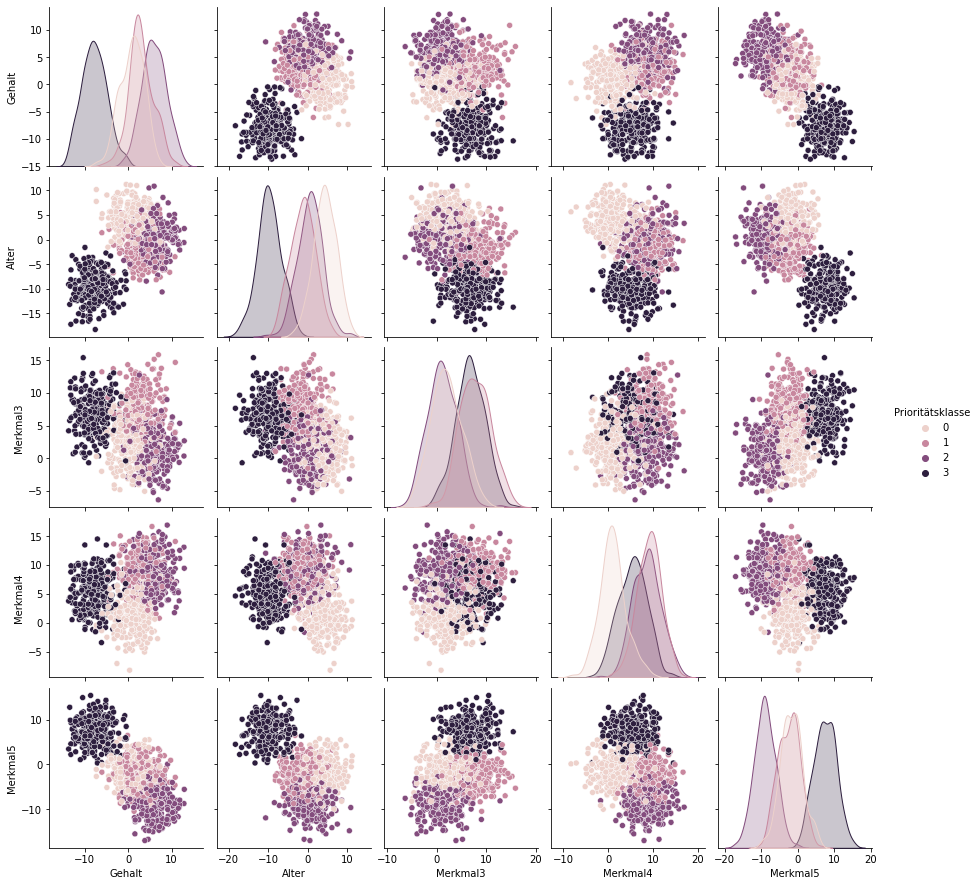

In [2]:
# Umwandlung zum DataFrome Objekt notwendig, ansonsten kann es nicht mit paiplot dargestellt werden!
df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Merkmal3', 'Merkmal4', 'Merkmal5']) #Was ist ein DF Object? -> Erklären
df['Prioritätsklasse'] = y
print(df)

sns.pairplot(df, hue = 'Prioritätsklasse') # hue ergibt hier erst nach der bilden von Klassen Sinn, zb 1-2, 2-3 und so weiter. Hier durch die Umwandlung zu Integer erfolgt

Auf den Achsen stellen 0 - 4 die einzelnen Merkmale dar.
Anmerkung: Corner = True kürzt Spiegelung weg, evtl. im zweiten Schritt nachher so darstellen, nachdem es komplett dargestellt wurde

<h2> Partionierendes Clustern <h2>

        Gehalt      Alter   Merkmal3   Merkmal4   Merkmal5  Prioritätsklasse
0     4.290005   1.259310   0.248272   3.661889  -0.144461                 0
1     1.681067  -2.458633   2.345374   7.185750  -1.590872                 1
2     4.593213  -0.934498   5.196479  11.328428 -16.728120                 2
3    -0.061675   2.912999   3.499712  -3.724727  -1.337118                 0
4     2.348517   1.409951  -0.292620   0.566496  -4.690789                 0
..         ...        ...        ...        ...        ...               ...
995  -0.273205  -2.541545   9.553714  11.305926   1.590382                 1
996   0.605529  -2.690792   9.946217  12.060691  -1.217652                 1
997  -7.930968 -14.081865   5.212296  11.049461   5.036039                 3
998   3.093534   6.031378   0.358702  11.234909 -11.089592                 2
999 -10.667132 -12.361535  11.974566   5.649404   9.059135                 3

[1000 rows x 6 columns]


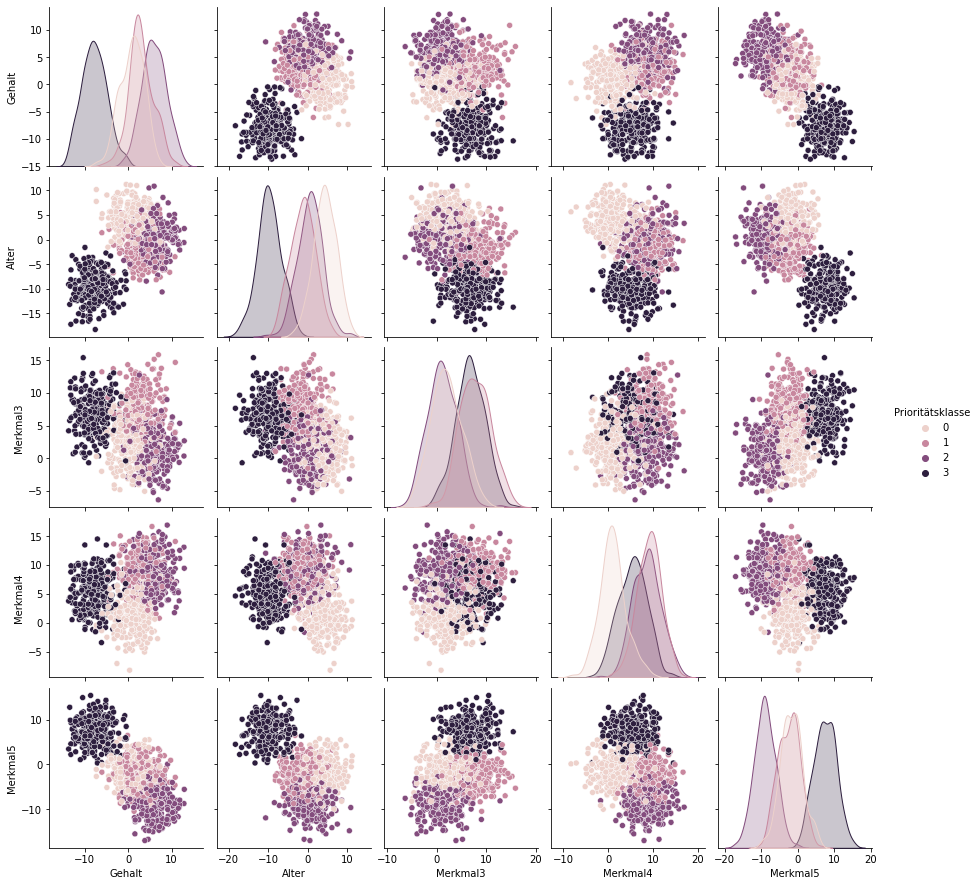

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Merkmal3', 'Merkmal4', 'Merkmal5']) #Was ist ein DF Object? -> Erklären
df['Prioritätsklasse'] = y
print(df)

sns.pairplot(df, hue = 'Prioritätsklasse')